kaggleデータセットの用意

In [1]:
pip install kaggle

In [2]:
import os
os.makedirs('/root/.kaggle', exist_ok=True)
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d yasserh/wine-quality-dataset


In [4]:
!unzip wine-quality-dataset.zip

In [2]:
import pandas as pd

# データの読み込み
wine = pd.read_csv('WineQT.csv')
print(wine.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

データ分析

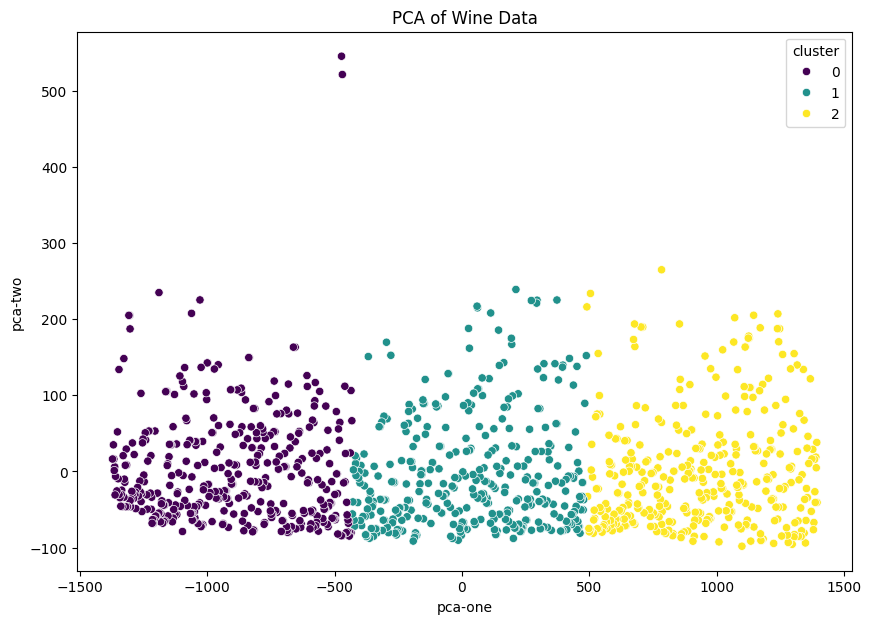

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# 特徴量の抽出
X = wine.drop(columns=['quality'])
X = wine.drop(columns=['Id'])



# K-Meansクラスタリング
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans.fit(X)

# クラスタリング結果を追加
wine['cluster'] = kmeans.labels_

# PCAで次元削減
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# PCA結果の追加
wine['pca-one'] = X_pca[:, 0]
wine['pca-two'] = X_pca[:, 1]

# PCA結果の可視化
plt.figure(figsize=(10, 7))
sns.scatterplot(x='pca-one', y='pca-two', hue='cluster', palette='viridis', data=wine, legend='full')
plt.title('PCA of Wine Data')
plt.show()

In [16]:
#クラスタごとの平均値
cluster_stats = wine.groupby('cluster').mean()
print(cluster_stats)

         fixed acidity  volatile acidity  citric acid  residual sugar  \
cluster                                                                 
0             7.584328          0.536629     0.231617        2.441418   
1             8.623784          0.523162     0.267595        2.534054   
2             8.786792          0.533760     0.308949        2.628571   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
cluster                                                                   
0         0.082463            16.728856             43.570896  0.995749   
1         0.087224            15.143243             44.562162  0.997053   
2         0.091485            14.880054             49.803235  0.997473   

               pH  sulphates    alcohol   quality           Id     pca-one  \
cluster                                                                      
0        3.335746   0.644851  10.709287  5.703980  1325.947761 -902.375897   
1        3.304757   0.63

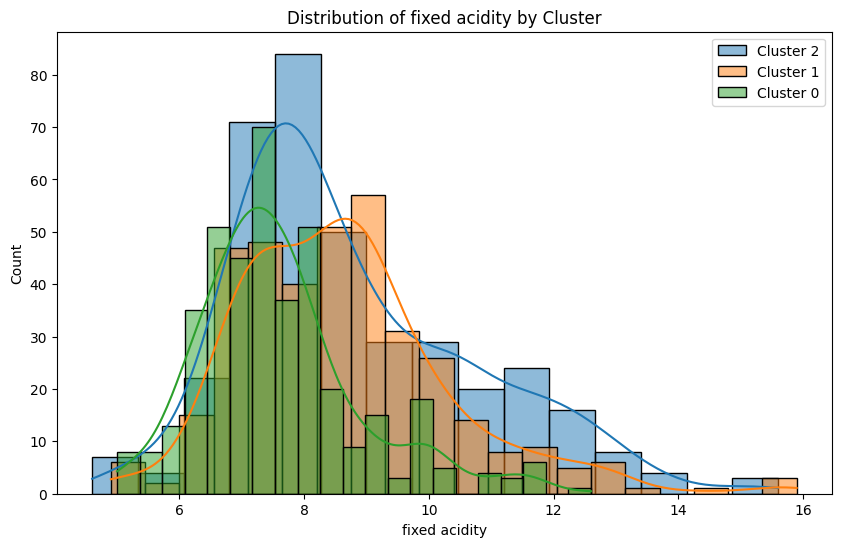

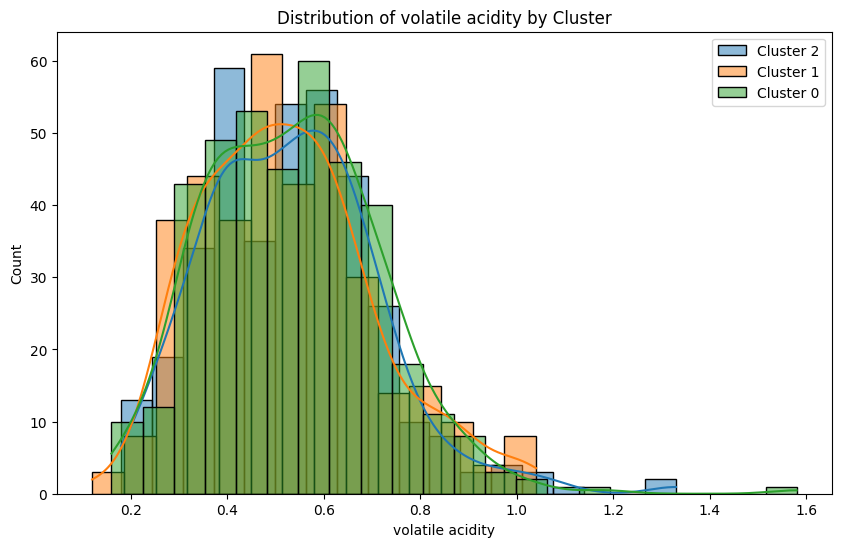

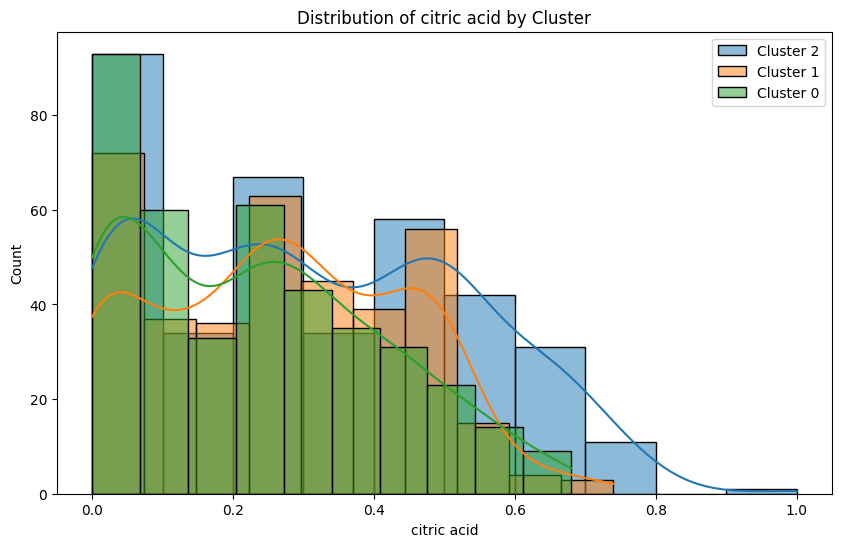

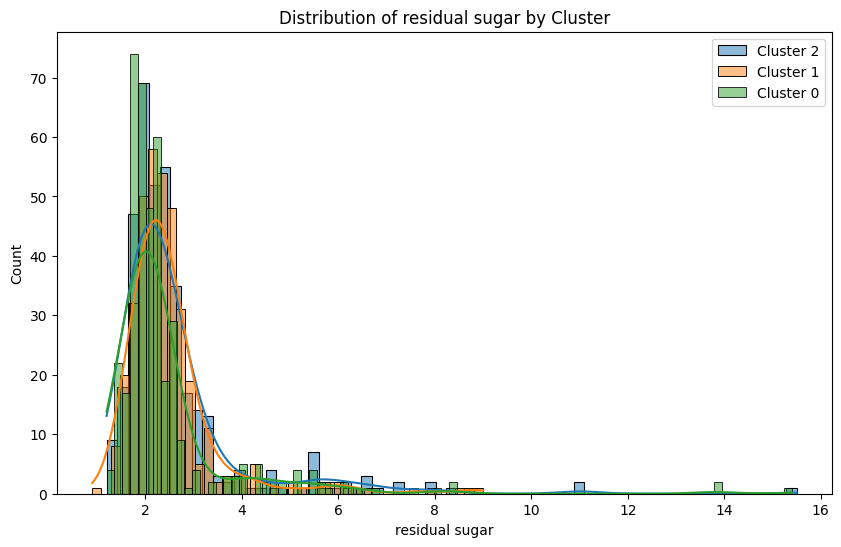

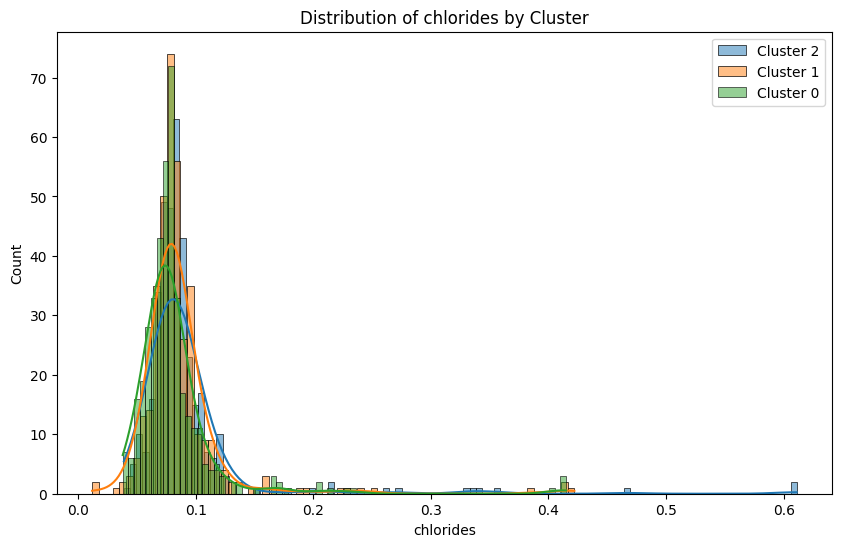

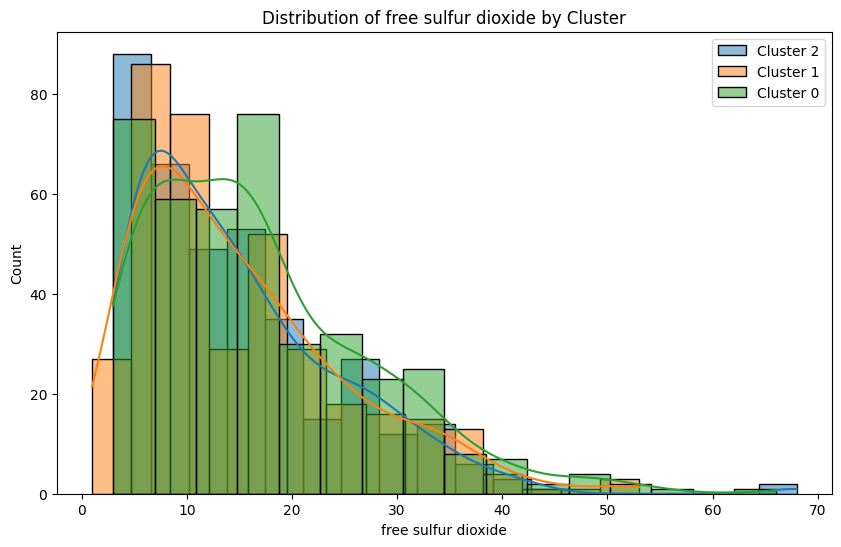

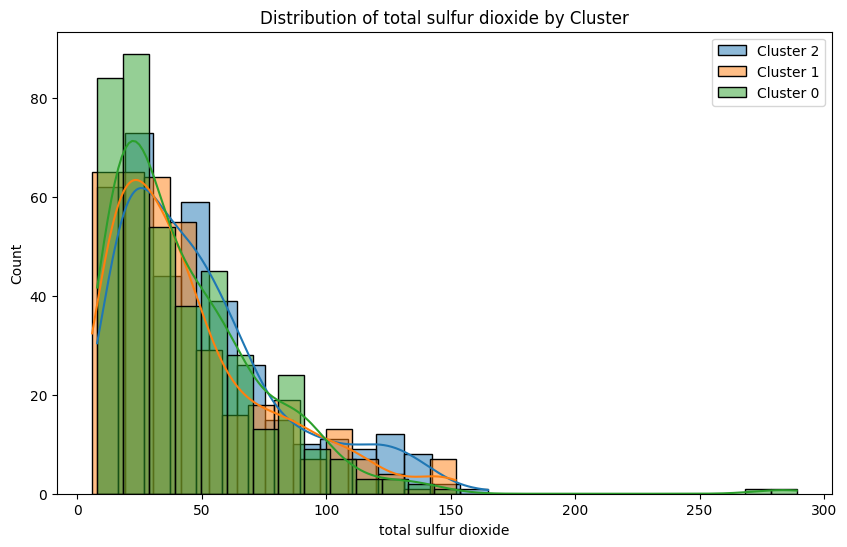

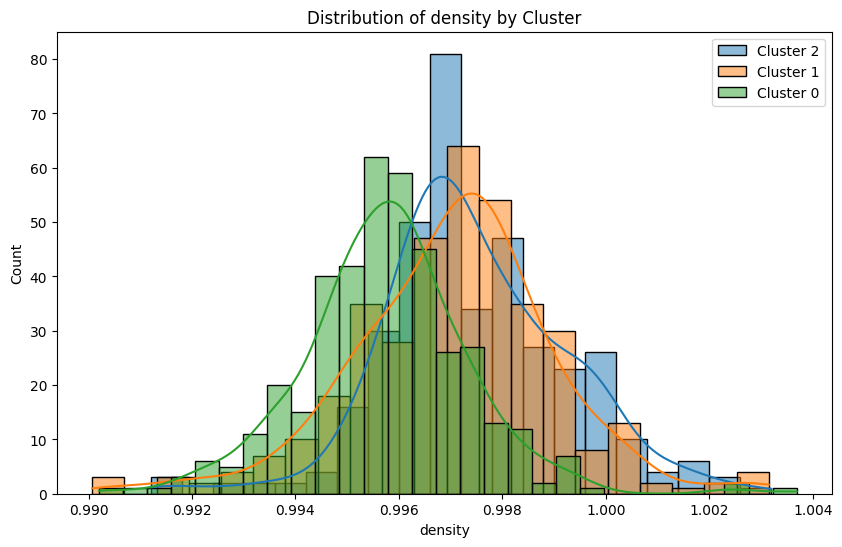

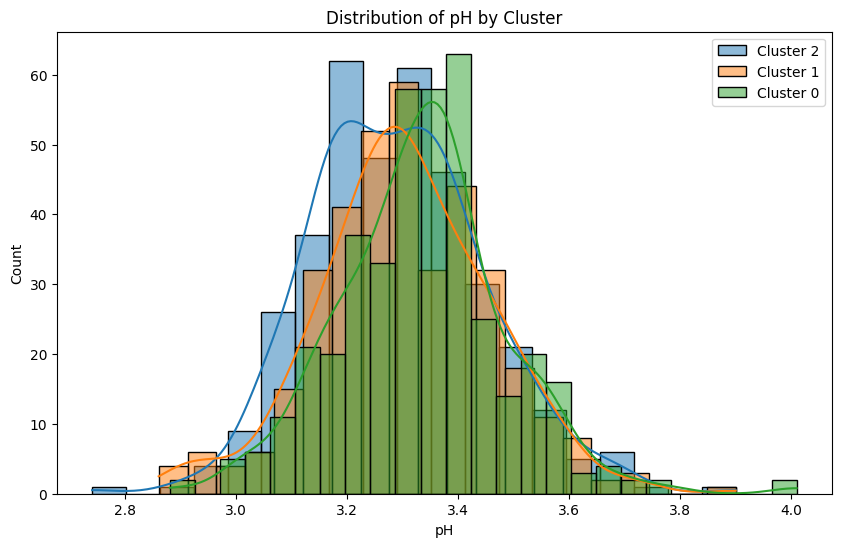

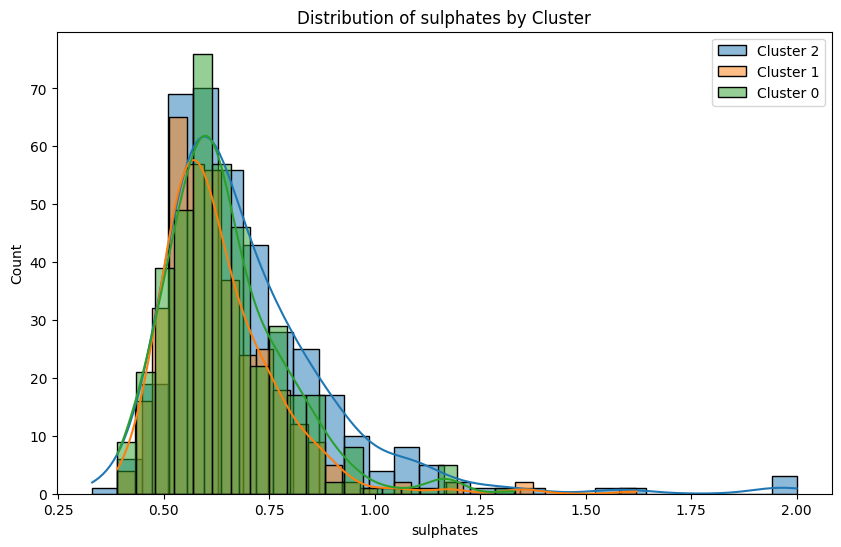

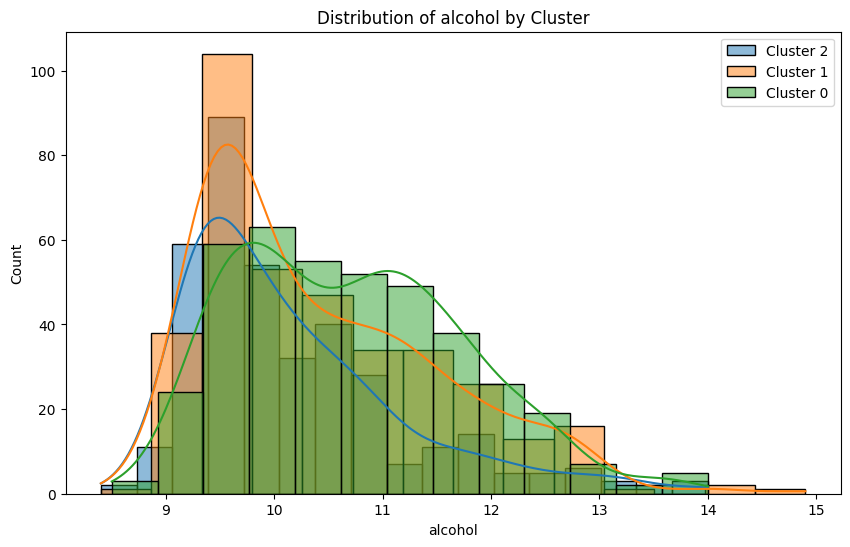

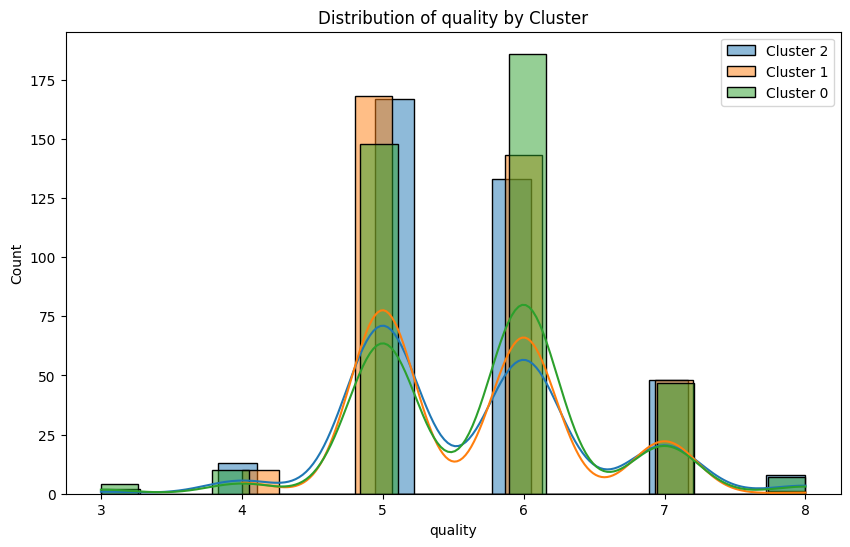

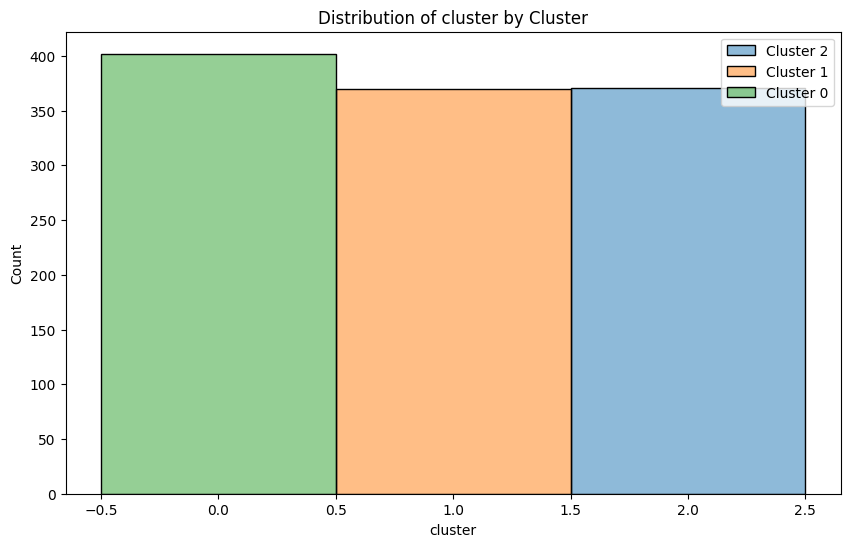

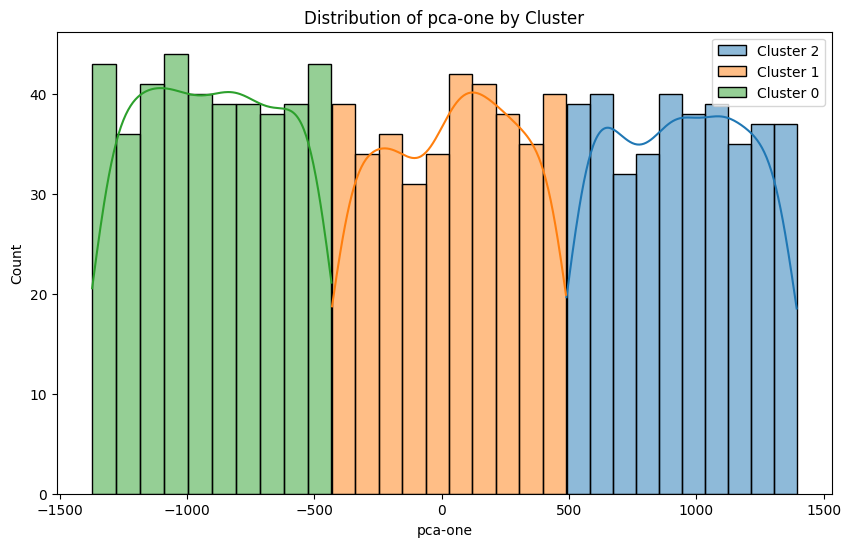

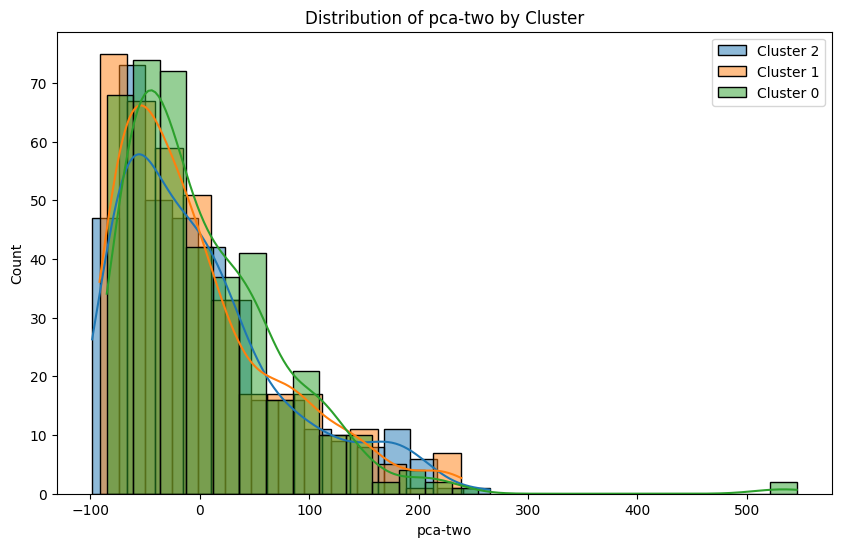

In [17]:
# 各クラスタの特徴量の分布をヒストグラムで表示
for column in X.columns:
    plt.figure(figsize=(10, 6))
    for cluster in wine['cluster'].unique():
        sns.histplot(wine[wine['cluster'] == cluster][column], kde=True, label=f'Cluster {cluster}')
    plt.title(f'Distribution of {column} by Cluster')
    plt.legend()
    plt.show()